In [1]:
#Import packages
import numpy as np
import pandas as pd
import os
import json
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
#Input data
df = pd.read_csv('data/ingredient.csv')

In [3]:
df.shape

(214, 9)

In [4]:
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [5]:
#Utility function for missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [6]:
#Missing data
missing_data(df)

,a,b,c,d,e,f,g,h,i
Total,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [7]:
#Statistical summary of dataset
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


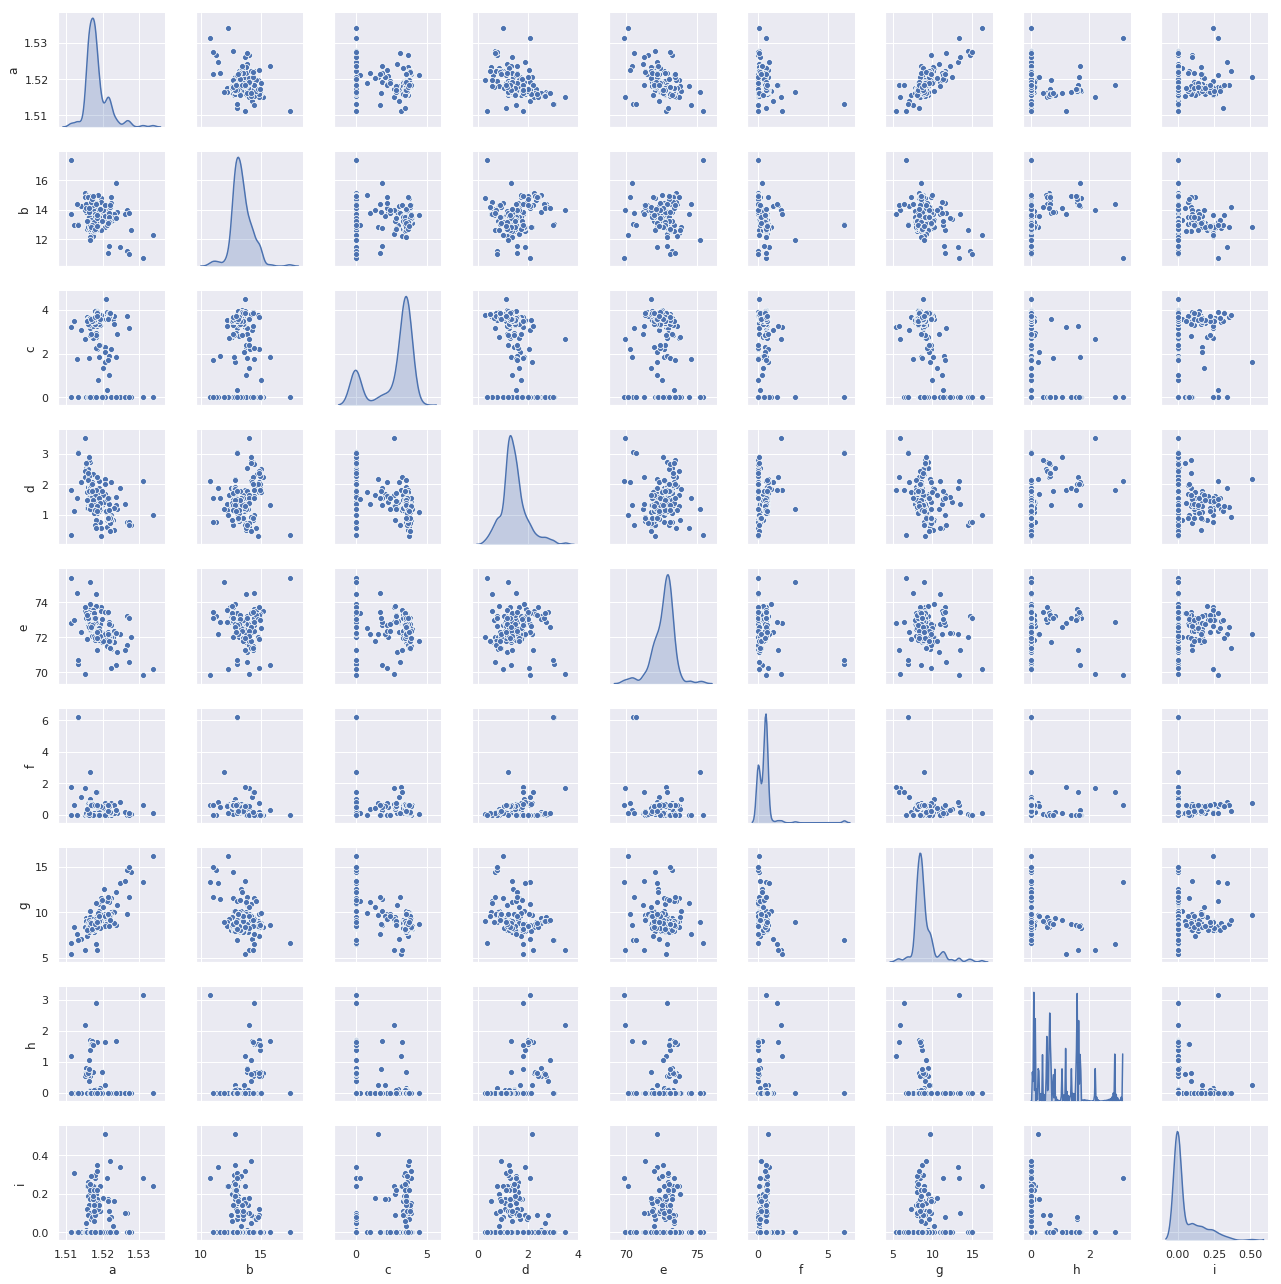

In [8]:
#PAIR PLOTS
sns.set()
columns = ['a','b','c','d','e','f','g','h','i']
sns.pairplot(df[columns],size = 2 ,kind ='scatter',diag_kind='kde')

In [9]:
#Correlation matrix
corrMatrix = df.corr()
corrMatrix

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


Index(['a', 'g', 'i', 'h', 'c', 'b', 'f', 'd', 'e'], dtype='object')


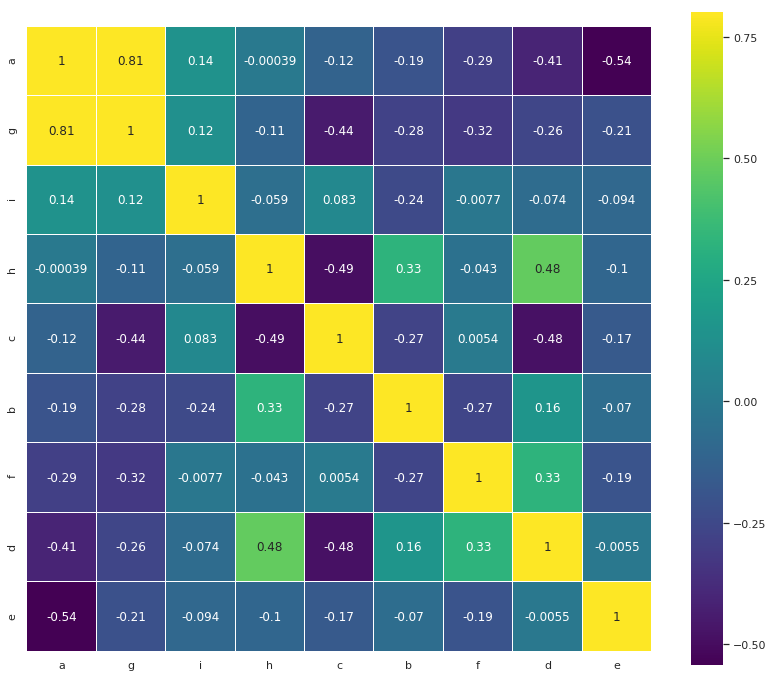

In [10]:
#Correlation matrix heatmap
k= 11
cols = corrMatrix.nlargest(k,'a')['a'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

a & g are highly correlated while having negative correlations with almost all of the other additives, which may indicate a chemical-catalyst relationship between a & g whereby both are typically mixed together regardless of the fuel type class for increased performance or chemical stability

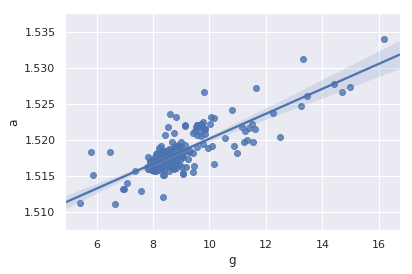

In [11]:
#Plot a with respect to g
a_g_scatter_plot = pd.concat([df['a'],df['g']],axis = 1)
sns.regplot(x='g',y = 'a',data = a_g_scatter_plot,scatter= True, fit_reg=True)

### Standardization 

In [12]:
#Standard scaler was utilized as the additives have different scales
from sklearn import preprocessing
# Get column names 
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,a,b,c,d,e,f,g,h,i
0,-0.335149,-0.476069,0.594473,0.492055,0.102319,0.066000,-0.364103,-0.352877,0.133634
1,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
2,1.529685,-0.120107,0.622270,-1.254576,-0.855320,-0.579492,0.854357,-0.352877,-0.277843
3,-0.226229,-1.040699,0.580575,-0.029927,0.645844,0.112107,-0.293672,-0.352877,-0.586451
4,-0.077703,0.027188,0.900234,-0.531832,-0.208266,0.127475,-0.568354,-0.352877,-0.586451


In [13]:
a = scaled_df['a']
b = scaled_df['b']
c = scaled_df['c']
d = scaled_df['d']
e = scaled_df['e']
f = scaled_df['f']
g = scaled_df['g']
h = scaled_df['h']
i = scaled_df['i']

### Distribution

In [14]:
#Set seaborn color palette
sns.set_palette(sns.color_palette("hls", 9))

In [15]:
#Dataframe Melt for Plotting
df_melt = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'f': f, 'g': g, 'h': h, 'i': i})

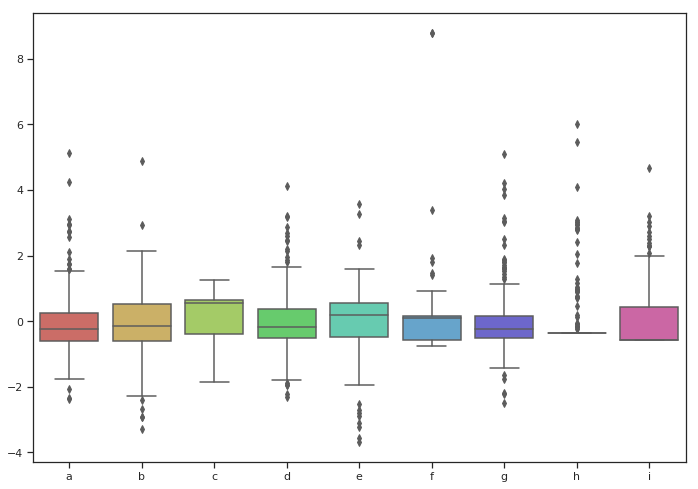

In [16]:
#Distribution Boxplot

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=df_melt, ax=ax)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


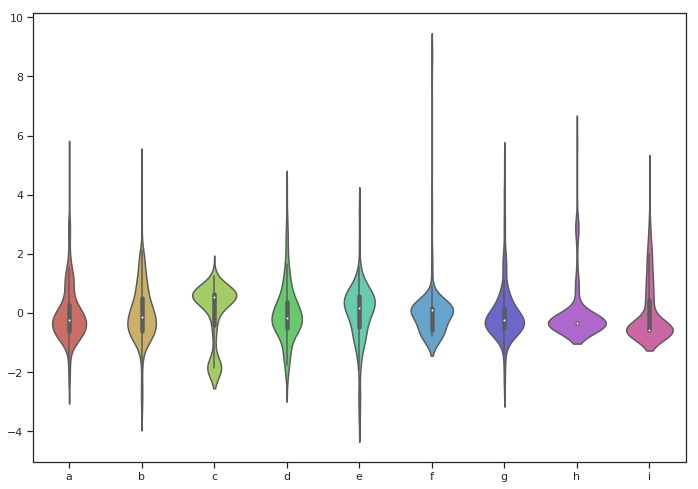

In [17]:
#Distribution Violinplot

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.violinplot(data=df_melt, ax=ax)

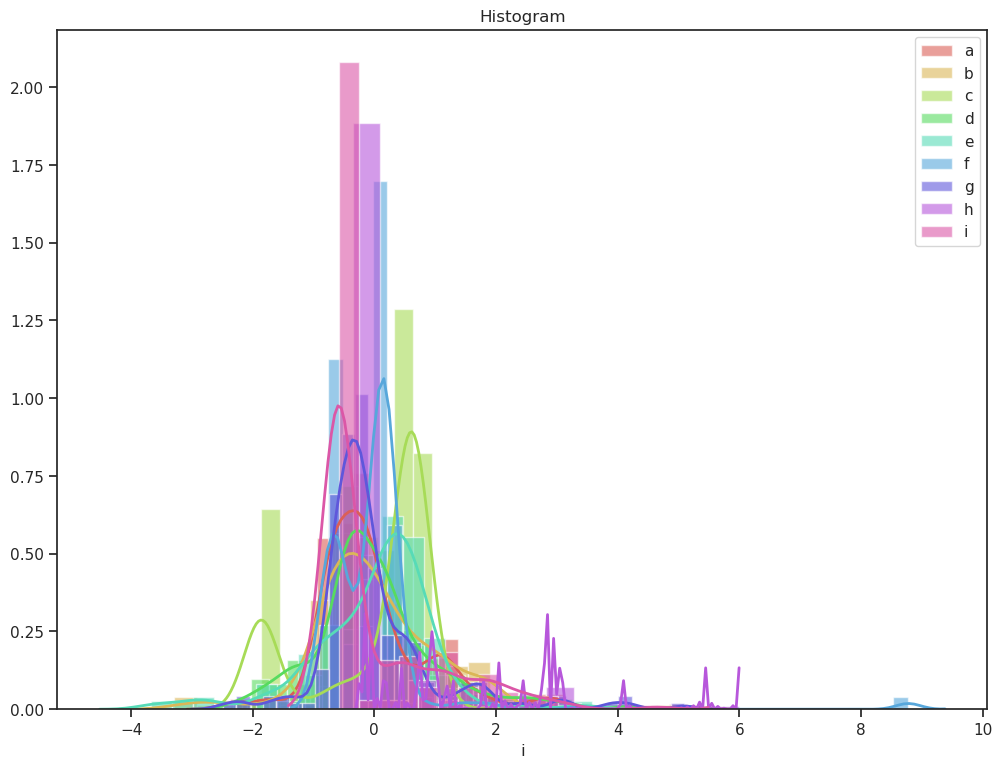

In [18]:
#Distribution Histogram
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.subplots(figsize=(12,9), dpi=100)
sns.distplot( a , label="a", **kwargs)
sns.distplot( b , label="b", **kwargs)
sns.distplot( c , label="c", **kwargs)
sns.distplot( d , label="d", **kwargs)
sns.distplot( e , label="e", **kwargs)
sns.distplot( f , label="f", **kwargs)
sns.distplot( g , label="g", **kwargs)
sns.distplot( h , label="h", **kwargs)
sns.distplot( i , label="i", **kwargs)

plt.title('Histogram')
plt.legend();